In [2]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
for root, dirs, files in os.walk("/0_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

In [4]:
for root, dirs, files in os.walk("example_data_02/", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

example_data_02/7_BA.mat
example_data_02/7_IR.mat
example_data_02/7_OR1.mat
example_data_02/7_OR2.mat
example_data_02/7_OR3.mat
example_data_02/N.mat


In [5]:
path = r'example_data_02/7_BA.mat'
mat = scipy.io.loadmat(path)

In [6]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X122_DE_time',
 'X122_FE_time',
 'X122RPM']

In [7]:
key_name = list(mat.keys())[3]

In [8]:
DE_data = mat.get(key_name)

In [9]:
file_name

'N.mat'

In [10]:
fault = np.full((len(DE_data), 1), file_name[:-4])

In [11]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [12]:
df_temp

,DE_data,fault
0,-0.111192,N
1,-0.083029,N
2,-0.042349,N
3,0.008970,N
4,0.057578,N
...,...,...
244734,0.156670,N
244735,0.095963,N
244736,0.025868,N
244737,-0.028372,N


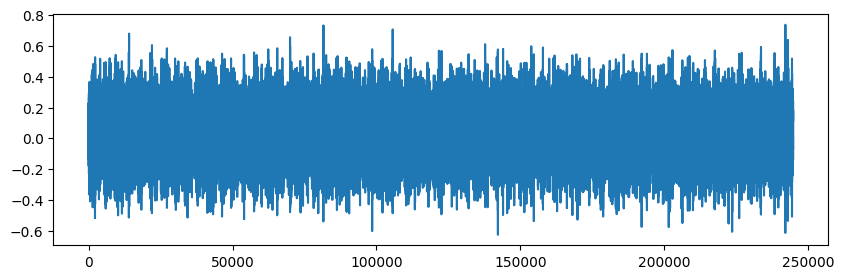

In [13]:
plt.figure(figsize=(10,3))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [15]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("example_data_02", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('all_faults.csv',index=False)     

example_data_02\7_BA.mat
['7_BA']
example_data_02\7_IR.mat
['7_BA' '7_IR']
example_data_02\7_OR1.mat
['7_BA' '7_IR' '7_OR1']
example_data_02\7_OR2.mat
['7_BA' '7_IR' '7_OR1' '7_OR2']
example_data_02\7_OR3.mat


C:\Users\kainak0\AppData\Local\Temp\ipykernel_10560\3139623312.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['7_BA' '7_IR' '7_OR1' '7_OR2' '7_OR3']
example_data_02\N.mat
['7_BA' '7_IR' '7_OR1' '7_OR2' '7_OR3' 'N']


In [16]:
df = pd.read_csv('all_faults.csv')

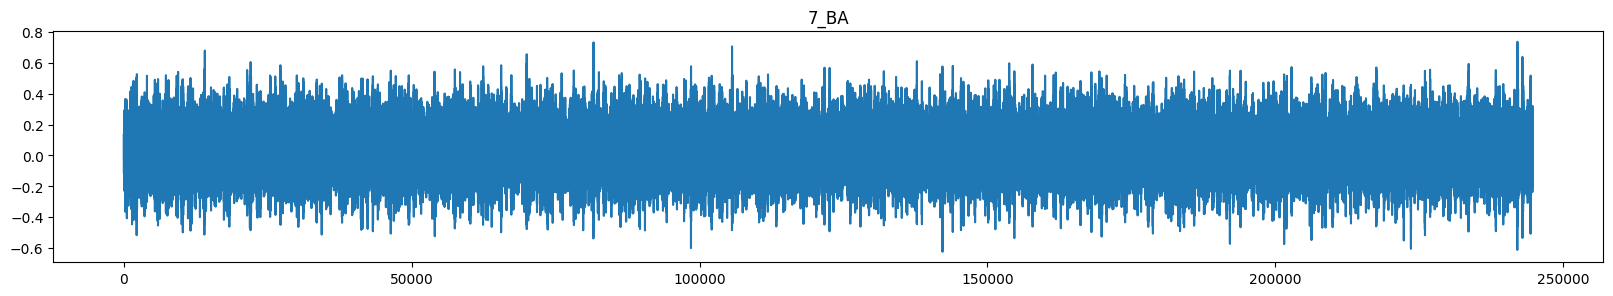

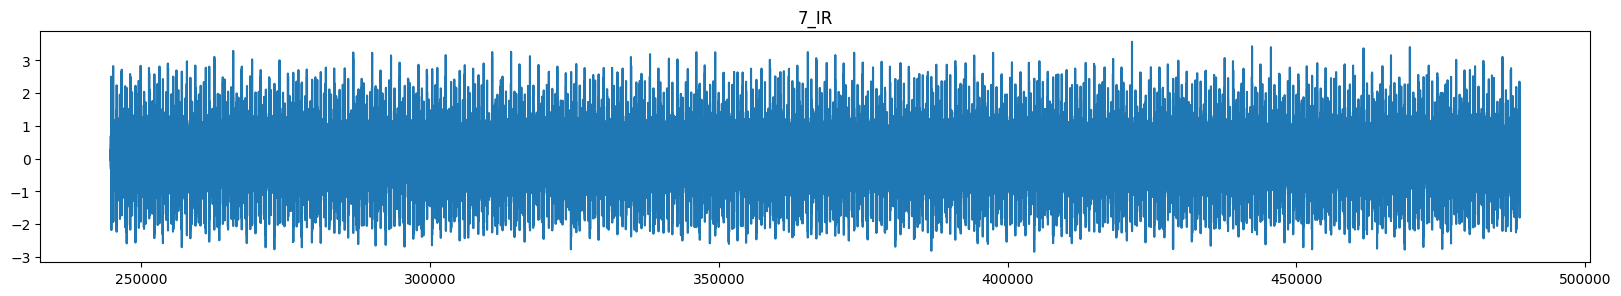

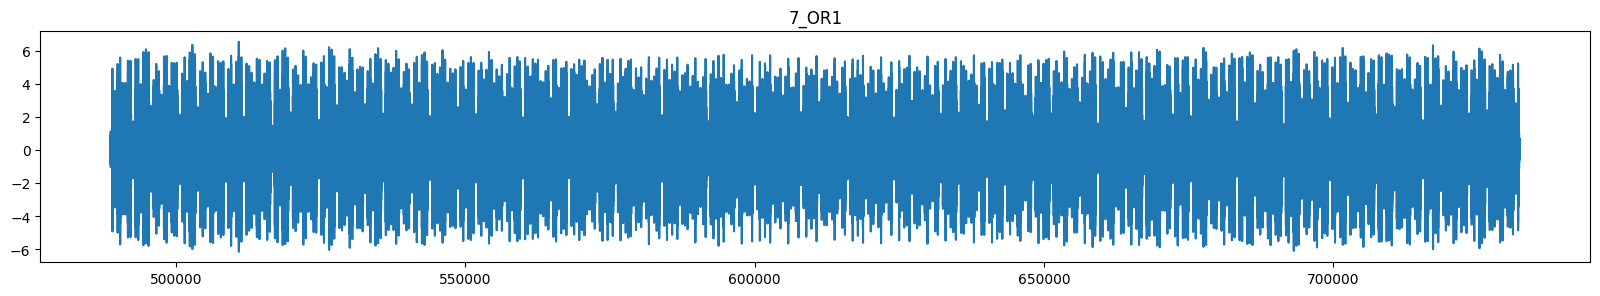

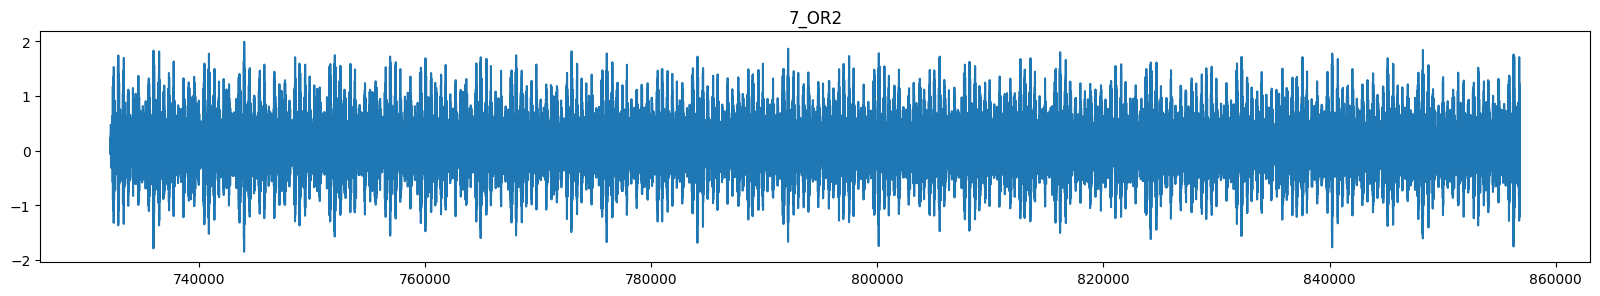

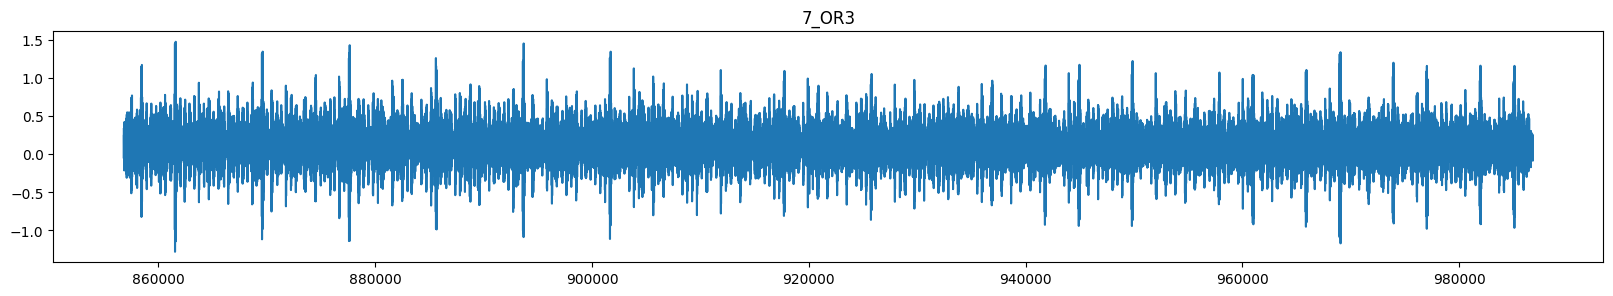

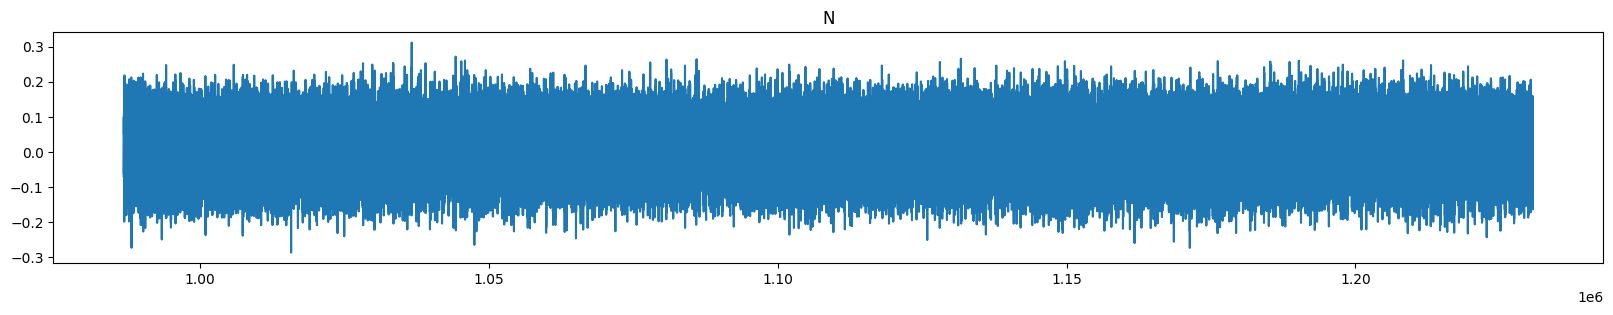

In [18]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(20,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

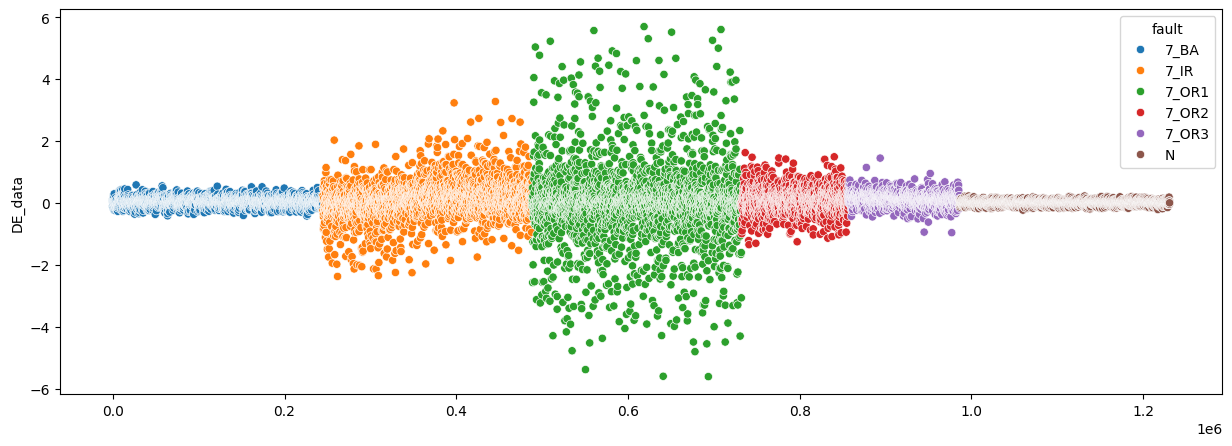

In [19]:

plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()